# Communicate data findings from Prosper Loan Data by `Vital Hakizimana`

## Investigation Overview

In this investigation, I wanted to look at the features that could be used to predict if people will get loan or not according to the relationship between those features with the laon status. The main focus was on 17 features selected: 'Term','LoanStatus','BorrowerAPR','BorrowerRate','BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','TotalInquiries','AvailableBankcardCredit','TotalTrades','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment','Recommendations'

## Dataset Overview

The data set consisted of 113,937 loans obeservations and 81 features during the starting. I selected the 17 best important features that are sensitive to the loan status and dropped all the missing values in the data set. Then I remained with 103244 loans observations and 17 features.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings 
warnings.filterwarnings ("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
LoanData_df = pd.read_csv('ProsperLoanData.csv')

In [3]:
Important_features = ['Term','LoanStatus','BorrowerAPR','BorrowerRate','BorrowerState','Occupation','EmploymentStatus',
                      'EmploymentStatusDuration','IsBorrowerHomeowner','TotalInquiries','AvailableBankcardCredit',
                     'TotalTrades','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment',
                     'Recommendations']

In [4]:
# Now here is the final data frame to work on
LoanData_df_final = LoanData_df[Important_features]
LoanData_df_final.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,TotalInquiries,AvailableBankcardCredit,TotalTrades,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,36,Completed,0.16516,0.1580,CO,Other,Self-employed,2.0,True,3.0,1500.0,11.0,"$25,000-49,999",3083.333333,9425,330.43,0
1,36,Current,0.12016,0.0920,CO,Professional,Employed,44.0,False,5.0,10266.0,29.0,"$50,000-74,999",6125.000000,10000,318.93,0
2,36,Completed,0.28269,0.2750,GA,Other,Not available,NaN,False,1.0,NaN,NaN,Not displayed,2083.333333,3001,123.32,0
3,36,Current,0.12528,0.0974,GA,Skilled Labor,Employed,113.0,True,1.0,30754.0,26.0,"$25,000-49,999",2875.000000,10000,321.45,0
4,36,Current,0.24614,0.2085,MN,Executive,Employed,44.0,True,9.0,695.0,39.0,"$100,000+",9583.333333,15000,563.97,0


In [5]:
# dropping the NaN values
LoanData_final = LoanData_df_final.dropna()
# checking if all NaN values were deleted
LoanData_final.isnull().sum()

Term                        0
LoanStatus                  0
BorrowerAPR                 0
BorrowerRate                0
BorrowerState               0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
TotalInquiries              0
AvailableBankcardCredit     0
TotalTrades                 0
IncomeRange                 0
StatedMonthlyIncome         0
LoanOriginalAmount          0
MonthlyLoanPayment          0
Recommendations             0
dtype: int64

# Loan status variations

The graph intend to show us the most loan status where many people are in so that we get and idea of which loan status is best fit with many people. From the graph, we will see that the most loan statuses are (current, completed, chargedoff,Defaulted and pastDue(1-15days). Therefore, other loan statuses have very small percentages compared to those ones

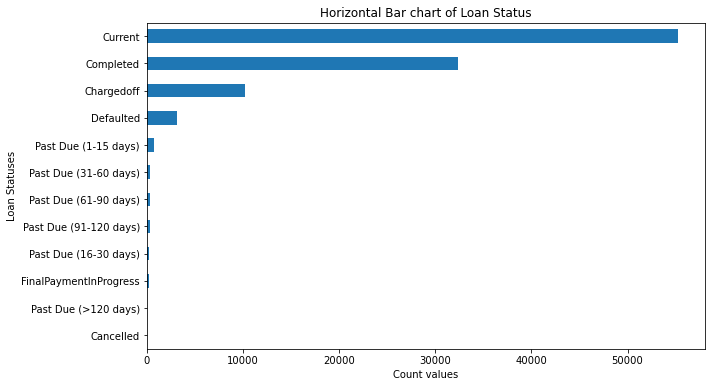

In [6]:
# plot bar chart showing the variation of loan status
plt.figure(figsize=[10, 6])
LoanData_final['LoanStatus'].value_counts(ascending=True).plot(kind='barh')
plt.title('Horizontal Bar chart of Loan Status')
plt.ylabel('Loan Statuses')
plt.xlabel('Count values')
plt.show()

# Distribution of StatedMonthlyIncome

StatedMonthlyIncome in the dataset take on a very large range of values, from about  0 at the lowest, to about 1,750,002 at the highest. Plotted on a logarithmic scale, the distribution of monthly income takes on a multimodal shape.

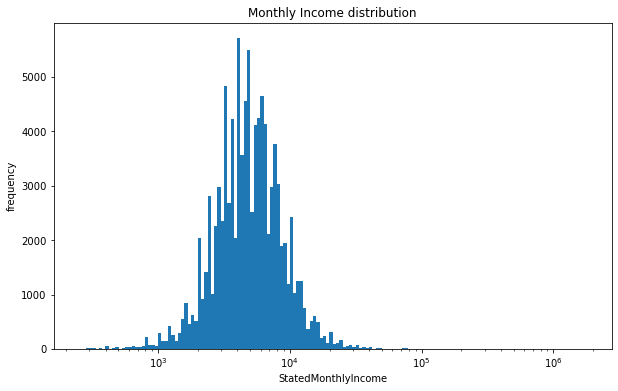

In [7]:
# setting the bin size
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(LoanData_final['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

# plot histogram distribution of monthly income
plt.figure(figsize=[10, 6])
plt.hist(data = LoanData_final, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
plt.title('Monthly Income distribution')
plt.ylabel('frequency')
plt.show()

# BorrowerAPR vs BorrowerRate 

Therefore, we can see that there is a very strong positive correlation between BorrowerAPR and BorrowerRate. This means that the increase of one variable led to the increase in other variable.

Text(0.5, 1.0, 'A scatterplot of BorrowerRate against BorrowerAPR')

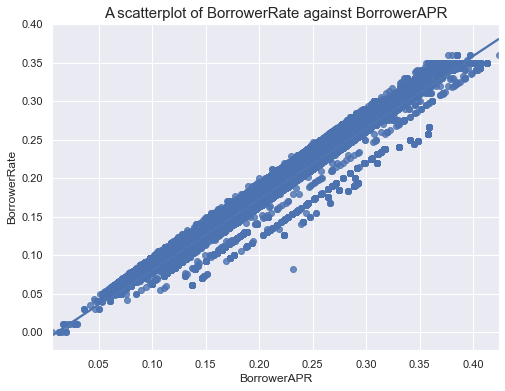

In [8]:
# Now let see the scatter plots of the most correlated variables
# Scatter plot of BorrowerAPR and BorrowerRate
plt.figure(figsize=(8,6))
sb.set()
sb.regplot(data = LoanData_final, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title(f'A scatterplot of BorrowerRate against BorrowerAPR',fontsize=15 )

# MonthlyLoanPayment vs LoanOriginalAmount

Therefore, fromt this graph also, we can see that there is a good positive correlation between LoanOriginalAmount and MonthlyLoanPayment. This means that the increase of one variable led to the increase in other variable. Therefore, by having large amount of loan, the client should expect to pay large amount of monthly loan payment

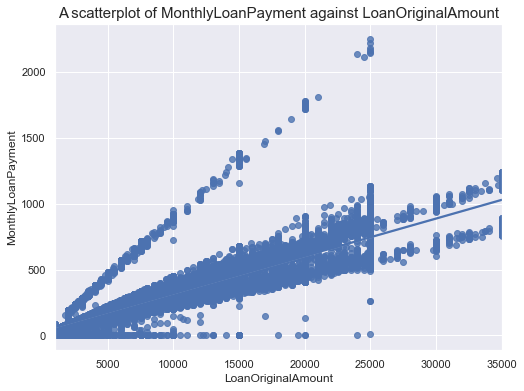

In [9]:
# Scatter plot of LoanOriginalAmount and MonthlyLoanPayment
plt.figure(figsize=(8,6))
sb.set()
sb.regplot(data = LoanData_final, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.title(f'A scatterplot of MonthlyLoanPayment against LoanOriginalAmount',fontsize=15 )
plt.show()

# LoanStatus vs IncomeRange

The bar graph here help us to analyse each loan status with their corresponding IncomeRange. For instance, can observe that for each category of loan status, we have more people from `25,000-49,999 and 50,000-74,999` income ranges. 

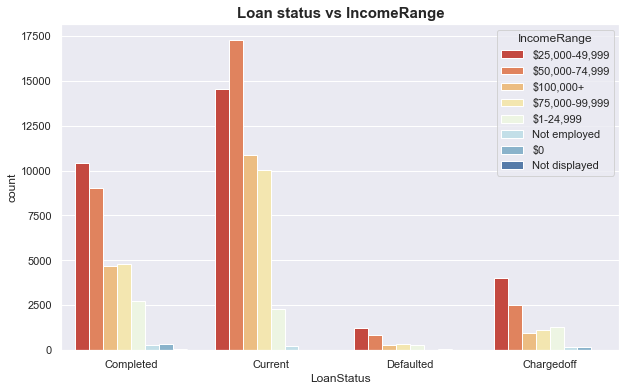

In [10]:
# let work on loan status informations
# Extract the most loan status in the data set
LoanData_final_best_loanStatus = LoanData_final[LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff',
                                                                                  'Defaulted'])]
# ploting the best loan data status with IncomeRange
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_final_best_loanStatus, x = 'LoanStatus', hue = 'IncomeRange', palette = 'RdYlBu')
plt.title('Loan status vs IncomeRange',fontsize=15,fontweight="bold");

# LoanStatus vs BorrowerState

In this bar graph here, I was trying to analyse the best states from the bar plot of states plotted previously to see how the loan status vary according to the states. For instance, the most people who completed to pay their loans comes from `CA` region followed by `FL` then `IL` and so on as we can see. This can also be done in each loan status to see which state is more effective than others

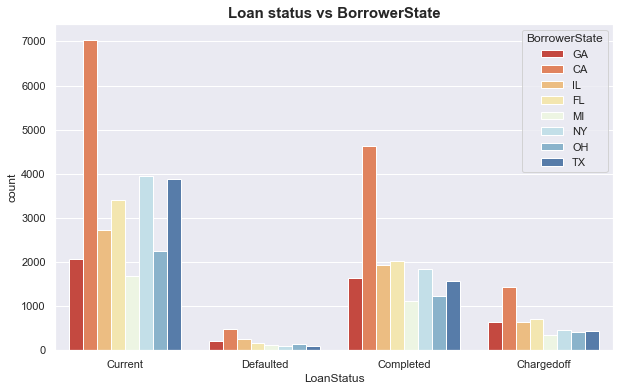

In [11]:
# let work on loan status informations
# Extract the most loan status and the most Borrower state  in the data set
LoanData_best = LoanData_final[(LoanData_final['LoanStatus'].isin(['Current','Completed','Chargedoff','Defaulted'])) & 
                       (LoanData_final['BorrowerState'].isin(['CA','NY','FL','TX','IL','GA','OH','MI']))]
# ploting the best loan data status with BorrowerState
plt.figure(figsize=(10,6))
sb.countplot(data = LoanData_best, x = 'LoanStatus', hue = 'BorrowerState', palette = 'RdYlBu')
plt.title('Loan status vs BorrowerState',fontsize=15,fontweight="bold");

# Relationship between LoanStatus, Term and EmployementStatus 

In this FacetGrid plot, I was able to analyse the relationship between three features `Term,LoanStatus and EmploymentStatus` using multivariate plot. From the graphs above, we can now observe that more people `with Term = 36 i.e 3years` and have `current` loan status are `Employed`, while those `with Term = 36` and have `Completed loan status`, the majority are `Full-time` employment status followed by `employed `ones. In addition, from the data we can conclude that we have few peole whose loan is for `only 12 months or 1 year`. this indicates that people `don't like to have short term loan`. Moreover, `for 5 years or 60 months`, we have only `3 kinds` of employment status that have this `long term loan`, these are `Employed, Full-time and self-employed` categories.

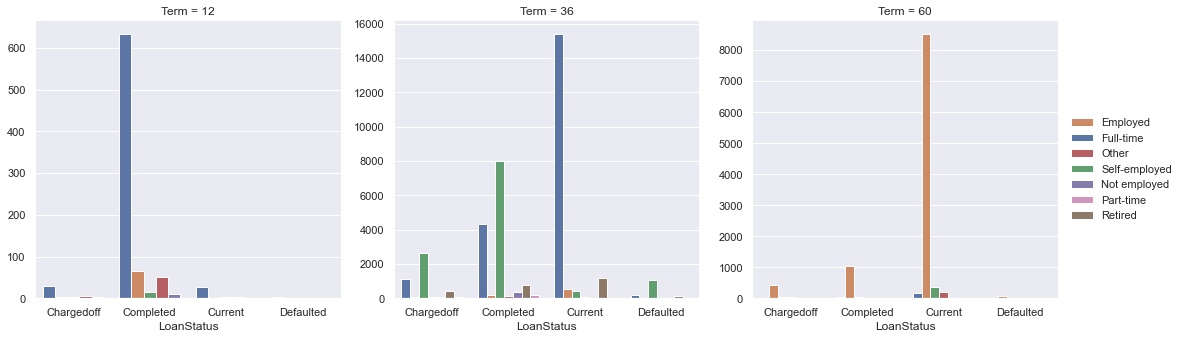

In [12]:
# Now let's look at the relationship between LoanStatus, Term and EmployementStatus all together
def countplot(x, hue,**kwargs):
    data=kwargs.pop("data")
    order=np.unique(data['LoanStatus'].values)
    sb.countplot(x, hue=hue, data=data,order=order,**kwargs)
    
g = sb.FacetGrid(LoanData_best, col='Term',  size=5, height=3, aspect=1, sharex=False, sharey=False)
g.map_dataframe(countplot, 'LoanStatus',hue='EmploymentStatus', alpha=.99,
                palette=sb.color_palette())
g.fig.subplots_adjust(top=0.9)
g.add_legend();

In [13]:
!jupyter nbconvert ProsperLoanData_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook ProsperLoanData_Part2.ipynb to slides
[NbConvertApp] Writing 813998 bytes to ProsperLoanData_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Hp\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Hp\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Hp\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\